# Week４授業前課題２　住宅価格の予測

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split # testとtrain分割
#from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.svm import SVR #SVM
from sklearn.tree import DecisionTreeRegressor # 決定木
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.metrics import mean_squared_error # 平均二乗誤差
# from matplotlib.colors import ListedColormap
# import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
Ames = pd.read_csv("train.csv")
Ames.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


## 【問題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
# GrLivAreaとYearBuiltと目的変数SalePriceを抜き出す
Ames = Ames.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
Ames.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## 【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。
<br>
sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
<br>
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。
<br>
sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation
<br>
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。



### ・分析

In [4]:
# 各特徴量を見る
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [5]:
# 平均値などを見る
Ames.describe() 

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [6]:
# 欠損値の有無を確認する
nan_Ames_sum = pd.DataFrame(Ames.isnull().sum()) # 列ごとの欠損値の合計。
nan_Ames_sum.columns = ["nan"]
nan_Ames_sum

# 各特徴量の欠損値なし


,nan
GrLivArea,0
YearBuilt,0
SalePrice,0


### ・前処理

In [7]:
# 訓練用（train）データ75%、検証用（validation）データ25%に分割する

# 特徴量データから"GrLivArea", "YearBuilt"を抜き出しXのndarray に格納
X = Ames.loc[:, ["GrLivArea", "YearBuilt"]]
X_array = np.array(X)
#print("X_array\n{}".format(X_array[:4, :]))

# 目的変数SalePrice列を抜き出し、yのndarrayに格納

# 特徴量をX,目的変数をyのndarrayに格納
y = Ames.loc[:, ["SalePrice"]]
y_array = np.array(y)
#print("y_array\n{}".format(y_array[:4]))
#print(y_array.shape)

y_array = y_array.ravel() # 1次元配列に変換
#print("１次元配列に変換したy_array\n{}".format(y_array[:4]))

# データを訓練用と検証用に分割 
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.25,random_state=0)

# print("X_train")
# print(X_train.shape)
# print(X_train[:4]) # 正常
# print("X_test")
# print(X_test.shape)
# print(X_test[:4]) # 正常
# print("y_train")
# print(y_train.shape)
# print(y_train[:4]) # 正常
# print("y_test") 
# print(y_test.shape)
# print(y_test[:4]) # 正常


### ・線形回帰による学習、推定

In [8]:
reg = LinearRegression().fit(X_train, y_train) # 学習
reg_pre = reg.predict(X_test) # 推定
print("推定\n{}".format(reg_pre[:4]))
print("正解",y_array[:4])

推定
[264130.40861155 155093.63716252 127493.47870881 236349.8094044 ]
正解 [208500 181500 223500 140000]


In [9]:
reg_pre.shape


(365,)

In [10]:
print(X_train.shape)
X_test.shape

(1095, 2)


(365, 2)

### ・評価

In [11]:
# 線形回帰を平均二乗誤差（Mean Squared Error, MSE）で評価
print("MSE:{}".format(mean_squared_error(y_test, reg_pre)))

MSE:2725908099.0636377


### ・可視化

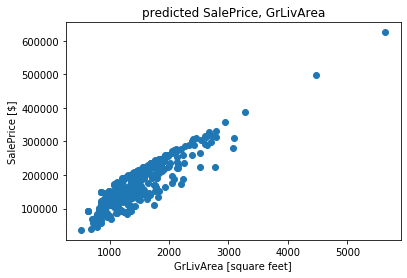

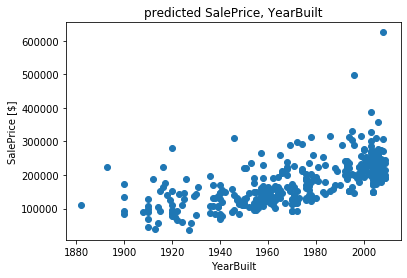

In [12]:
# 散布図で可視化

plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], reg_pre)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], reg_pre)
plt.show()

### 考察：GrLivエリアが広いほど、価格も上がっている。築年数も数値が上がるほど価格が緩やかに上がり、相関が見られる。

## 【問題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
<br>
線形回帰<br>
SVM<br>
決定木<br>
ランダムフォレスト<br>
公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。
<br>sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
<br>sklearn.svm.SVR — scikit-learn 0.20.2 documentation
<br>sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation
<br>sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation
<br>SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



### 線形回帰

In [13]:
reg = LinearRegression().fit(X_train, y_train) # 学習
reg_pre = reg.predict(X_test) # 推定
print("推定(4サンプル）\n{}".format(reg_pre[:4]))
print("正解（４サンプル）\n", y_array[:4])

推定(4サンプル）
[264130.40861155 155093.63716252 127493.47870881 236349.8094044 ]
正解（４サンプル）
 [208500 181500 223500 140000]


In [14]:
# 線形回帰を平均二乗誤差（Mean Squared Error, MSE）で評価
reg_mse = mean_squared_error(y_test, reg_pre)
print("MSE:{}".format(reg_mse))

MSE:2725908099.0636377


線形回帰


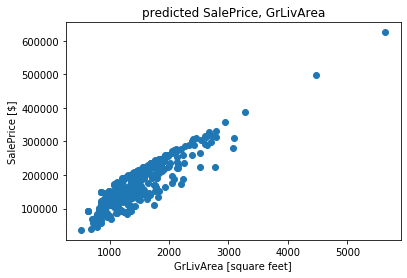

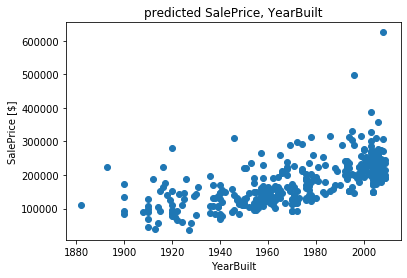

In [15]:
# 散布図で可視化

print("線形回帰")
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], reg_pre)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], reg_pre)
plt.show()


### SVM

In [16]:
# SVM

# 学習gamma='scale', C=1.0, epsilon=0.2
SVM = SVR()
SVM.fit(X_train, y_train) 

SVM_pre = SVM.predict(X_test)
print("推定(4サンプル）\n{}".format(SVM_pre[:4]))
print("正解（４サンプル）\n", y_array[:4])


推定(4サンプル）
[162500.00000373 162499.91791873 162500.         162499.86466844]
正解（４サンプル）
 [208500 181500 223500 140000]


/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
# SVMの平均二乗誤差評価
svm_mse = mean_squared_error(y_test, SVM_pre)
print("MSE:{}".format(svm_mse))

MSE:6962337669.872041


SVM


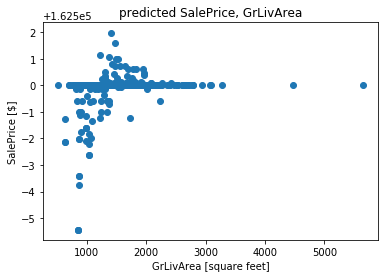

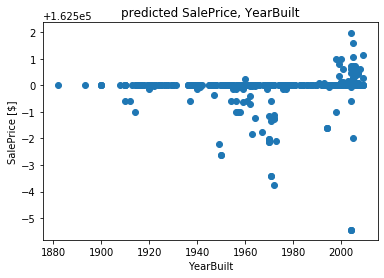

In [18]:
# SVMの可視化

print("SVM")
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], SVM_pre)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], SVM_pre)
plt.show()

### 決定木

In [19]:
# 決定木で学習、推定

DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train) 
DTR_pre = DTR.predict(X_test)
print("推定(4サンプル）\n{}".format(DTR_pre[:4]))
print("正解（４サンプル）\n", y_array[:4])


推定(4サンプル）
[191000. 174500. 125000. 144000.]
正解（４サンプル）
 [208500 181500 223500 140000]


In [20]:
# 決定木の平均二乗誤差評価
dtr_mse = mean_squared_error(y_test, DTR_pre)
print("MSE:{}".format(dtr_mse))

MSE:3223085886.2377477


決定木


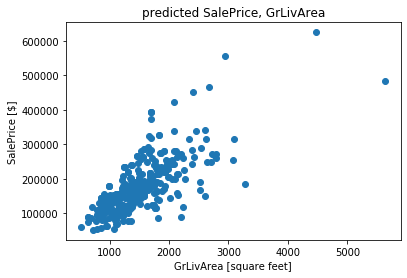

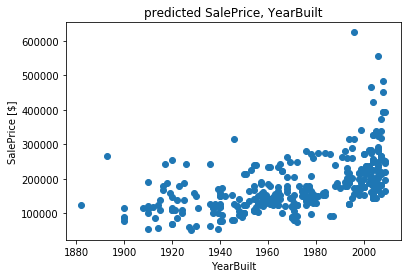

In [21]:
# 決定木を散布図で可視化

print("決定木")
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], DTR_pre)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], DTR_pre)
plt.show()

### ランダムフォレスト

In [22]:
# ランダムフォレストで学習、推定

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR_pre = RFR.predict(X_test)
print("推定(4サンプル）\n{}".format(RFR_pre[:4]))
print("正解（４サンプル）\n", y_array[:4])

推定(4サンプル）
[206060.  147270.  129792.5 182400. ]
正解（４サンプル）
 [208500 181500 223500 140000]


/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# ランダムフォレストの平均二乗誤差評価
RFR_mse = mean_squared_error(y_test, RFR_pre)
print("MSE:{}".format(RFR_mse))

MSE:1907680301.1292553


ランダムフォレスト


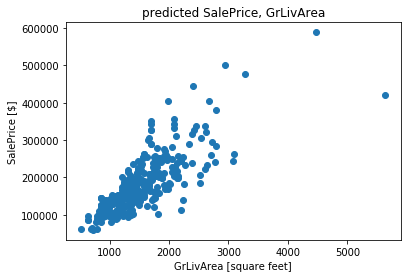

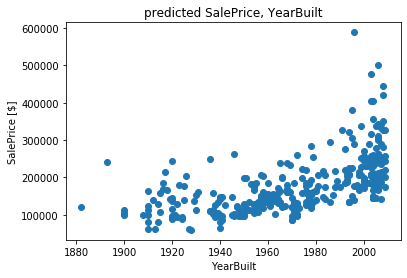

In [24]:
# ランダムフォレストを散布図で可視化

print("ランダムフォレスト")
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], RFR_pre)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], RFR_pre)
plt.show()

In [25]:
#指標値をまとめる

mse= [reg_mse, svm_mse, dtr_mse, RFR_mse]
model_names = ["線形回帰", "SVM", "決定木", "ランダムフォレスト"]
mse_metrics = pd.DataFrame([mse], columns=model_names, index = ["mse"])
display(mse_metrics)

,線形回帰,SVM,決定木,ランダムフォレスト
mse,2.725908e+09,6.962338e+09,3.223086e+09,1.907680e+09


### 考察

MSE指標によれば、ランダムフォレストが最も精度が高く、SVMが最も低い結果となった。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習

ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。
<br>
Kaggleのカーネルも参考にできます。
<br>
House Prices: Advanced Regression Techniques | Kaggle